In [22]:
hideMe="Yes" # hide this cell from show in Jupyter notebook
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el_last = $(this).find('.cm-variable:last');
      el_first = $(this).find('.cm-variable:first');
      eltikz = $(this).find('.cm-variable:first');
      if(id == 0 || el_last.text() == 'hideMe' || el_first.text() == 'hideMe')
        {$(this).hide();}
      if(id == 0 || eltikz.text() == 'tikz') 
        {$(this).hide();}
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {$(this).show(); });
    $('div.output_prompt').css('opacity', 1);
    $('.input_area').show();
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
hideMe="Yes" # hide this cell from show in Jupyter notebook
%load_ext tikzmagic
#from __future__ import print_function
import tikzmagic

from IPython.display import display, Math, Markdown, Latex
import numpy as np

def printMatrixs(matrixS): 
    raw_counts = max([len(a) for a in matrixS])
    for i in range(0,raw_counts):
        for A in matrixS: 
            if len(A)>=i: printMatrix(A,i)
        print()

def printMatrix(matrixA,raw_current):
    print("[", end = "") #spec = "{:<"+str(col_width)+"G}"
    for j in range (len(matrixA[raw_current])): 
        col_width = max([len("{:G}".format(a)) for a in  matrixA[:,j]])
        if j>0: print(" ",end = "") 
        print( ("{:<"+str(col_width)+"G}").format(matrixA[raw_current][j]), end = "") 
    print("]", end = "")
##################################################
import notebook
from jupyter_core.paths import jupyter_config_dir, jupyter_config_path
print(jupyter_config_dir())
print(jupyter_config_path())
#help("modules")   
import sys             
import os
print('\n'.join(sys.path), "\ncurrent folder ==",os.getcwd())
#pip list

C:\Users\polit\.jupyter
['C:\\Users\\polit\\.jupyter', 'd:\\html_doc\\math\\probability\\markov_chains\\env\\etc\\jupyter', 'C:\\ProgramData\\jupyter']
D:\HTML_DOC\Math\Probability\Markov_Chains\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\math\probability\markov_chains\env

d:\html_doc\math\probability\markov_chains\env\lib\site-packages
d:\html_doc\math\probability\markov_chains\env\lib\site-packages\pip-20.2b1-py3.8.egg
d:\html_doc\math\probability\markov_chains\env\lib\site-packages\win32
d:\html_doc\math\probability\markov_chains\env\lib\site-packages\win32\lib
d:\html_doc\math\probability\markov_chains\env\lib\site-packages\Pythonwin
d:\html_doc\math\probability\markov_chains\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython 
current folder == D:\HTML_DOC\Math\Probability\Markov_Chains\env


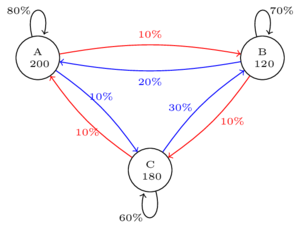

In [3]:
%%tikz -s 300,300

\node [circle, draw, align=center, text width=0.3cm, font=\tiny] at (0,0) (A) {A 200};
\node [circle, draw, align=center, text width=0.3cm, font=\tiny] at (4,0) (B) {B 120};
\node [circle, draw, align=center, text width=0.3cm, font=\tiny] at (2,-2)(C) {C 180};

\path (A) edge [loop above, left]  node {\tiny 80\%}(A);
\path (B) edge [loop above, right] node {\tiny 70\%}(B);
\path (C) edge [loop below, left]  node {\tiny 60\%}(C);

\draw[->][red] (A) edge [bend left=10,above] node {\tiny 10\%}(B);
\draw[->][blue](B) edge [bend left=10,below] node {\tiny 20\%}(A);
\draw[->][red] (B) edge [bend left=10,right] node {\tiny 10\%}(C);
\draw[->][blue](C) edge [bend left=10,left]  node {\tiny 30\%}(B);
\draw[->][red] (C) edge [bend left=10,below] node {\tiny 10\%}(A);
\draw[->][blue](A) edge [bend left=10,above] node {\tiny 10\%}(C);

%#https://youtu.be/Uz3JIp6EvIg

### [Prob & Stats - Markov Chains (1 of 38) What are Markov Chains: An Introduction](https://youtu.be/Uz3JIp6EvIg)

<table align="left">
<tr style="text-align:left;">
<td>
$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & \hphantom{\text{0.}}B & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
\underline{0.1} & \underline{0.1} & \underline{0.6}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}to A\\ to B\\ to C\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
\quad
% -----------------------
% X0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[X_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\vphantom{\begin{matrix}text{X_0}\end{matrix}}
\\
%(2 second-line,2 second-col)
\overbrace{
\left[
\begin{matrix}
0.40 & A=200\\ 
0.24 & B=120\\
\underline{0.36} & \underline{C=180}\end{matrix}
\right]}^{X_0}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0 & \hphantom{\text{A==}} 500\end{matrix}
%This is the super matrix
\end{matrix} %This is the super matrix
$$
</td>
</tr>

<tr>
<td>
$$
\boxed{\left[\substack{\text{Next State}\\ \text{Future State}}\right] = 
\left[
\substack{\text{Matrix of}\\ \text{Transition}\\ \text{Probabilities}}
\right]
*[\text{Current State}]}
$$
</td>
</tr>
    
<tr>
<td>
$$[X_1] = [P]*[X_0]$$
</td>
</tr>

<tr style="text-align:left;">
<td>
$$
% -----------------------
% X1 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[X_1\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & \hphantom{\text{0.}}B & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
\underline{0.1} & \underline{0.1} & \underline{0.6}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}to A\\ to B\\ to C\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
% Sign Multiplication
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\begin{matrix}*\end{matrix}
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\vphantom{\begin{matrix}text{X_0}\end{matrix}}
\\
%(2 second-line,2 second-col)
\overbrace{
\left[
\begin{matrix}0.40 & A=200\\ 0.24 & B=120\\ \underline{0.36} & \underline{C=180}\end{matrix}
\right]}^{X_0}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0 & \hphantom{\text{A==}} 500\end{matrix}
%This is the super matrix
\end{matrix}
% -----------------------
% Sign =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\begin{matrix}=\end{matrix}
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\overbrace{
\left[
\begin{array}{ccccc}
0.8*0.4 &+& 0.2*0.24 &+&  0.1*0.36\\
0.1*0.4 &+& 0.7*0.24 &+&  0.3*0.36\\
0.1*0.4 &+& 0.1*0.24 &+&  0.6*0.36
\end{array}
\right]}^{X_1}
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
% -----------------------
% Sign =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\begin{matrix}=\end{matrix}
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$
    
$
% -----------------------
%  X_1 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[X_1\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\vphantom{\begin{matrix}text{X_1}\end{matrix}}
\\
%(2 second-line,2 second-col)
\overbrace{
\left[
\begin{matrix}0.404 & A=202\\ 0.316 & B=158\\ \underline{0.280} & \underline{C=140}\end{matrix}
\right]}^{X_1}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0 & \hphantom{\text{A==}} 500\end{matrix}
%This is the super matrix
\end{matrix} %This is the super matrix
$
</td>
</tr>
</table>

### [Prob & Stats - Markov Chains (2 of 38) Markov Chains: An Introduction (Another Method)](https://youtu.be/3P8ZIIYgpvc)

### [Prob & Stats - Markov Chains (3 of 38) Why Are Markov Chains Called "Markov Chains"?](https://youtu.be/ECrsoUtsKq0)


<table align="left">
<tr style="text-align:left;">
<td>
$$[X_1] = [P]*[X_0]$$
</td>
<td>
$$[X_2] = [P]*[X_1]$$
</td>
<td>
$$[X_3] = [P]*[X_2]$$
</td>
<td>
$$[X_4] = [P]*[X_3]$$
</td>
</tr>
</table>


<table align="left">
<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
[X_1]
$$
</td>
<td style="vertical-align: middle;">
$=$
</td>
<td>
$$
%----------------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\vphantom{\begin{matrix}text{X_1}\end{matrix}}
\\
%(2 second-line,2 second-col)
\overbrace{
\begin{bmatrix}
0.404\\
0.316\\
\underline{0.280}
\end{bmatrix}}^{X_1}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0\end{matrix}
\end{matrix} %This is the super matrix
%============================
$$
</td>
<td>
$=$
</td>
<td>
$$
%----------------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{
\begin{matrix}A & \hphantom{\text{0.}}B & \hphantom{\text{0.}}C\end{matrix}}^{P}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
\underline{0.1} & \underline{0.1} & \underline{0.6}
\end{bmatrix} 
\\
%(3 third-line, 1column )
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
\end{matrix} %This is the super matrix
%==============================
$$
</td>
<td>
$$
%-------------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\vphantom{\begin{matrix}text{X_0}\end{matrix}}
\\
%(2 second-line,2 second-col)
\overbrace{
\left[
\begin{matrix}
0.40\\
0.24\\
\underline{0.36}
\end{matrix}
\right]}^{X_0}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0\end{matrix}
\end{matrix} %This is the super matrix
%=========================
$$
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td>
</tr>
    
    
<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
[X_2]
$$
</td>
<td style="vertical-align: middle;">
$=$
</td>
<td>
$$
\begin{matrix} %This is the super matrix
%(2 second-line,2 second-col)
\overbrace{
\left[
\begin{matrix}
\hphantom{0.404}\\
\hphantom{0.316}\\
\underline{\hphantom{0.280}}
\end{matrix}
\right]}^{X_2}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0\end{matrix}
%This is the super matrix
\end{matrix} %This is the super matrix
$$
</td>
<td>
$=$
</td>
<td>
$$
%-----------------------
\begin{matrix} %This is the super matrix
%(1 -line Actual matrix)
\overbrace{
\begin{bmatrix}
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
\underline{0.1} & \underline{0.1} & \underline{0.6}
\end{bmatrix}}^{P}
\\
%(2 -line)
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
\end{matrix} %This is the super matrix
$$
</td>
<td>
$$
%-------------------------
\begin{matrix} %This is the super matrix
%(1 -line)
\overbrace{
\left[
\begin{matrix}
0.404\\
0.316\\
\underline{0.280}
\end{matrix}
\right]}^{X_1}
\\
%(2-line)
\begin{matrix} 1.0\end{matrix}
\end{matrix} %This is the super matrix
$$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
%\begin{matrix} %This is the super matrix
%(1 -line Actual matrix)
\overbrace{
\begin{bmatrix}
0.8*0.404 &+& 0.2*0.316 &+&  0.1*0.280\\
0.1*0.404 &+& 0.7*0.316 &+&  0.3*0.280\\
0.1*0.404 &+& 0.1*0.316 &+&  0.6*0.280
\end{bmatrix}}^{X_2}
\\
%(2 -line)
\vphantom{0.1}
%\end{matrix} %This is the super matrix
%============================
$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{matrix} %This is the super matrix
%(1 -line)
\overbrace{
\left[
\begin{matrix}
0.4144\\
0.3456\\
\underline{0.2400}
\end{matrix}
\right]}^{X_2}
\\
%(2-line)
\begin{matrix} 1.0\end{matrix}
\end{matrix} %This is the super matrix
$$
</td>
</tr>
</table>

In [4]:
X0 = np.array([0.4, 0.24, 0.36])
P0 = np.array([[0.8, 0.2, 0.1], 
               [0.1, 0.7, 0.3], 
               [0.1, 0.1, 0.6]])
X1 = P0.dot(X0.T)
X2 = P0.dot(X1.T)
X3 = P0.dot(X2.T)
display(Math('X_0 ={0}'.format([i for i in X0])));print(X0)
print(X1)
print(X2)
print(X3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

<IPython.core.display.Math object>

[0.4  0.24 0.36]
[0.404 0.316 0.28 ]
[0.4144 0.3456 0.24  ]
[0.42464 0.35536 0.22   ]


### [Prob & Stats - Markov Chains (4 of 38) Another Way to Calculate the Markov Chains](https://youtu.be/bBZrKmP020c)

<table align="left">
<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
X_1
$$
</td>
<td>
$=$
</td>
<td>
$P X_0$
</td>
<td>
$=$
</td>
<td>
$$
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.404\\
0.316\\
0.280
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>


<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
X_2
$$
</td>
<td>
$=$
</td>
<td>
$P X_1$
</td>
<td>
$=$
</td>
<td>
$$
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
%-------------------------
\begin{bmatrix} %This is the super matrix
0.404\\
0.316\\
0.280
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4144\\
0.3456\\
0.2400
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>


<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
X_3
$$
</td>
<td>
$=$
</td>
<td>
$P X_2$
</td>
<td>
$=$
</td>
<td>
$$
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4144\\
0.3456\\
0.2400
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.42464\\
0.35536\\
0.22000
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>
</table>

<table align="left">
<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
X_1
$$
</td>
<td>
$=$
</td>
<td>
$P^1 X_0$
</td>
<td>
$=$
</td>
<td>
$$
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.404\\
0.316\\
0.280
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>

    
<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
X_2
$$
</td>
<td>
$=$
</td>
<td>
$P^2 X_0$
</td>
<td>
$=$
</td>
<td>
$$
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
\hphantom{0.8} & \hphantom{0.2} & \hphantom{0.1} \\
\hphantom{0.1} & P^2 & \hphantom{0.3} \\
\hphantom{0.1} & \hphantom{0.1} & \hphantom{0.6}
\end{bmatrix} %This is the super matrix
%===============================================
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
\hphantom{0.4144}\\
\hphantom{0.3456}\\
\hphantom{0.2400}
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>


<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
X_3
$$
</td>
<td>
$=$
</td>
<td>
$P^3 X_0$
</td>
<td>
$=$
</td>
<td>
$$
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
\hphantom{0.8} & \hphantom{0.2} & \hphantom{0.1} \\
\hphantom{0.1} & P^3 & \hphantom{0.3} \\
\hphantom{0.1} & \hphantom{0.1} & \hphantom{0.6}
\end{bmatrix} %This is the super matrix
%===============================================
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
\hphantom{0.42464}\\
\hphantom{0.35536}\\
\hphantom{0.22000}
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>
</table>

<table align="left">
<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
P^2
$$
</td>
<td>
$=$
</td>
<td>
$P\cdot P$
</td>
<td>
$=$
</td>
<td>
$
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
\hphantom{0.8} & \hphantom{0.2} & \hphantom{0.1} \\
\hphantom{0.1} & \hphantom{0.7} & \hphantom{0.3} \\
\hphantom{0.1} & \hphantom{0.1} & \hphantom{0.6}
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>

<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
P^3
$$
</td>
<td>
$=$
</td>
<td>
$P^2\cdot P$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
\hphantom{0.8} & \hphantom{0.2} & \hphantom{0.1} \\
\hphantom{0.1} & P^2 & \hphantom{0.3} \\
\hphantom{0.1} & \hphantom{0.1} & \hphantom{0.6}
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
\hphantom{0.8} & \hphantom{0.2} & \hphantom{0.1} \\
\hphantom{0.1} & \hphantom{0.7} & \hphantom{0.3} \\
\hphantom{0.1} & \hphantom{0.1} & \hphantom{0.6}
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>
</table>

In [5]:
X0 = np.array([0.4, 0.24, 0.36])
P0 = np.array([[0.8, 0.2, 0.1], 
               [0.1, 0.7, 0.3], 
               [0.1, 0.1, 0.6]])
P2 = P0.dot(P0); P3 = P2.dot(P0); P4 = P3.dot(P0);
printMatrixs([P0,P2,P3,P4]); print(X0)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.8 0.2 0.1][0.67 0.31 0.2][0.587 0.371 0.28][0.5347 0.4051 0.338]
[0.1 0.7 0.3][0.18 0.54 0.4][0.238 0.454 0.42][0.2778 0.4074 0.412]
[0.1 0.1 0.6][0.15 0.15 0.4][0.175 0.175 0.3 ][0.1875 0.1875 0.25 ]
[0.4  0.24 0.36]


<table align="left">
<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
P^2
$$
</td>
<td>
$=$
</td>
<td>
$P\cdot P$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.67 & 0.31 & 0.2 \\
0.18 & 0.54 & 0.4 \\
0.15 & 0.15 & 0.4
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>


<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
P^3
$$
</td>
<td>
$=$
</td>
<td>
$P^2\cdot P$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.67 & 0.31 & 0.2 \\
0.18 & 0.54 & 0.4 \\
0.15 & 0.15 & 0.4
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.587 & 0.371 & 0.28\\
0.238 & 0.454 & 0.42 \\
0.175 & 0.175 & 0.30
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>
</table>

In [6]:
X0 = np.array([0.4, 0.24, 0.36])
P0 = np.array([[0.8, 0.2, 0.1], 
               [0.1, 0.7, 0.3], 
               [0.1, 0.1, 0.6]])
P2 = P0.dot(P0); P3 = P2.dot(P0); P4 = P3.dot(P0);
X1 = P0.dot(X0); X2 = P2.dot(X0); X3 = P3.dot(X0);
print(X0); print(X1); print(X2); print(X3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.4  0.24 0.36]
[0.404 0.316 0.28 ]
[0.4144 0.3456 0.24  ]
[0.42464 0.35536 0.22   ]


<table align="left">
<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
X_1
$$
</td>
<td>
$=$
</td>
<td>
$P^1\cdot X_0$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.404\\
0.316\\
0.28
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>

    
<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
X_2
$$
</td>
<td>
$=$
</td>
<td>
$P^2\cdot X_0$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.67 & 0.31 & 0.2 \\
0.18 & 0.54 & 0.4 \\
0.15 & 0.15 & 0.4
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4144\\
0.3456\\
0.24
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>


<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
X_3
$$
</td>
<td>
$=$
</td>
<td>
$P^3\cdot X_0$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.587 & 0.371 & 0.28\\
0.238 & 0.454 & 0.42 \\
0.175 & 0.175 & 0.30
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.42464\\
0.35536\\
0.22
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>
</table>

### [Prob & Stats - Markov Chains (5 of 38) What Happens if the Markov Chain Continues?](https://youtu.be/9wBPa2eu_lc)


<table align="left">
<tr style="text-align:left;">
<td style="vertical-align: middle;">
$$
X_1
$$
</td>
<td>
$=$
</td>
<td>
$P^1\cdot X_0$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
$
</td>
<td>
$=$
</td>
<td>
$$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.404\\
0.316\\
0.28
\end{bmatrix} %This is the super matrix
%========================
$$
</td>
</tr>


<tr style="text-align:left;">
<td style="vertical-align: middle;">
$
X_2
$
</td>
<td>
$=$
</td>
<td>
$P^1\cdot X_1$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.404\\
0.316\\
0.28
\end{bmatrix} %This is the super matrix
%========================
$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4144\\
0.3456\\
0.24
\end{bmatrix} %This is the super matrix
%========================
$
</td>
</tr>


<tr style="text-align:left;">
<td style="vertical-align: middle;">
$
X_3
$
</td>
<td>
$=$
</td>
<td>
$P^1\cdot X_2$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4144\\
0.3456\\
0.24
\end{bmatrix} %This is the super matrix
%========================
$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.42464\\
0.35536\\
0.22
\end{bmatrix} %This is the super matrix
%========================
$
</td>
</tr>
</table>

In [7]:
X0 = np.array([0.4, 0.24, 0.36])
P0 = np.array([[0.8, 0.2, 0.1], 
               [0.1, 0.7, 0.3], 
               [0.1, 0.1, 0.6]])
X1 = P0.dot(X0); X2 = P0.dot(X1); X3 = P0.dot(X2);
X4 = P0.dot(X3); X5 = P0.dot(X4); X6 = P0.dot(X5); X7 = P0.dot(X6); X8 = P0.dot(X7);
print("0=",X0); print("1=",X1); print("2=",X2); print("3=",X3)
print("4=",X4); print("5=",X5); print("6=",X6); print("7=",X7); print("8=",X8); 
hideMe="Yes" # hide this cell from show in Jupyter notebook

0= [0.4  0.24 0.36]
1= [0.404 0.316 0.28 ]
2= [0.4144 0.3456 0.24  ]
3= [0.42464 0.35536 0.22   ]
4= [0.432784 0.357216 0.21    ]
5= [0.4386704 0.3563296 0.205    ]
6= [0.44270224 0.35479776 0.2025    ]
7= [0.44537134 0.35337866 0.20125   ]
8= [0.44709781 0.35227719 0.200625  ]


<table align="left">
<tr style="text-align:left;">
<td style="vertical-align: middle;">
$
X_4
$
</td>
<td>
$=$
</td>
<td>
$P^1\cdot X_3$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.42464\\
0.35536\\
0.22
\end{bmatrix} %This is the super matrix
%========================
$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.432784\\
0.357216\\
0.21 
\end{bmatrix} %This is the super matrix
%========================
$
</td>
</tr>

<tr style="text-align:left;">
<td style="vertical-align: middle;">
$
X_5
$
</td>
<td>
$=$
</td>
<td>
$P^1\cdot X_4$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.432784\\
0.357216\\
0.21 
\end{bmatrix} %This is the super matrix
%========================
$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4386704\\
0.3563296\\
0.205
\end{bmatrix} %This is the super matrix
%========================
$
</td>
</tr>


<tr style="text-align:left;">
<td style="vertical-align: middle;">
$
X_6
$
</td>
<td>
$=$
</td>
<td>
$P^1\cdot X_5$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4386704\\
0.3563296\\
0.205
\end{bmatrix} %This is the super matrix
%========================
$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.44270224\\
0.35479776\\
0.2025
\end{bmatrix} %This is the super matrix
%========================
$
</td>
</tr>


<tr style="text-align:left;">
<td style="vertical-align: middle;">
$
X_7
$
</td>
<td>
$=$
</td>
<td>
$P^1\cdot X_6$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.44270224\\
0.35479776\\
0.2025
\end{bmatrix} %This is the super matrix
%========================
$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.44537134\\
0.35337866\\
0.20125
\end{bmatrix} %This is the super matrix
%========================
$
</td>
</tr>


<tr style="text-align:left;">
<td style="vertical-align: middle;">
$
X_8
$
</td>
<td>
$=$
</td>
<td>
$P^1\cdot X_7$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.44537134\\
0.35337866\\
0.20125
\end{bmatrix} %This is the super matrix
%========================
$
</td>
<td>
$=$
</td>
<td>
$
%-------------------------
\begin{bmatrix} %This is the super matrix
0.44709781\\
0.35227719\\
0.200625
\end{bmatrix} %This is the super matrix
%========================
$
</td>
</tr>
</table>

In [8]:
X0 = np.array([0.4, 0.24, 0.36])
P0 = np.array([[0.8, 0.2, 0.1], 
               [0.1, 0.7, 0.3], 
               [0.1, 0.1, 0.6]])
X_next = X0
for i in range(1,20):
    X_next = P0.dot(X_next)
    if i > 7: 
        print("{0:2}=".format(i), end ="")
        for j in X_next: print("{0:.4f} ".format(j), end ="")
        print()
hideMe="Yes" # hide this cell from show in Jupyter notebook

 8=0.4471 0.3523 0.2006 
 9=0.4482 0.3515 0.2003 
10=0.4489 0.3510 0.2002 
11=0.4493 0.3506 0.2001 
12=0.4496 0.3504 0.2000 
13=0.4497 0.3502 0.2000 
14=0.4498 0.3501 0.2000 
15=0.4499 0.3501 0.2000 
16=0.4499 0.3501 0.2000 
17=0.4500 0.3500 0.2000 
18=0.4500 0.3500 0.2000 
19=0.4500 0.3500 0.2000 


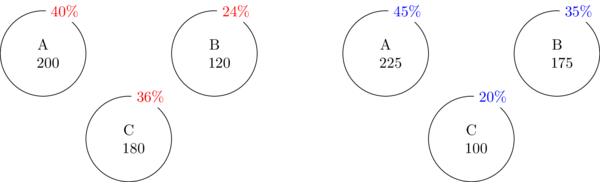

In [9]:
%%tikz -s 600,300

\node [circle, draw, align=center, text width=0.3cm, minimum size=2cm] at (0,0) (A) {A 200};
\node[red,anchor=base,text=red,fill=white] at (A.60)  {$40\%$};
\node [circle, draw, align=center, text width=0.3cm, minimum size=2cm] at (4,0) (B) {B 120};
\node[red,anchor=base,text=red,fill=white] at (B.60)  {$24\%$};
\node [circle, draw, align=center, text width=0.3cm, minimum size=2cm] at (2,-2)(C) {C 180};
\node[red,anchor=base,text=red,fill=white] at (C.60)  {$36\%$};

\node [circle, draw, align=center, text width=0.3cm, minimum size=2cm] at (8,0) (A2) {A 225};
\node[blue,anchor=base,text=blue,fill=white] at (A2.60)  {$45\%$};
\node [circle, draw, align=center, text width=0.3cm, minimum size=2cm] at (12,0) (B2) {B 175};
\node[red,anchor=base,text=blue,fill=white] at (B2.60)  {$35\%$};
\node [circle, draw, align=center, text width=0.3cm, minimum size=2cm] at (10,-2)(C2) {C 100};
\node[red,anchor=base,text=blue,fill=white] at (C2.60)  {$20\%$};

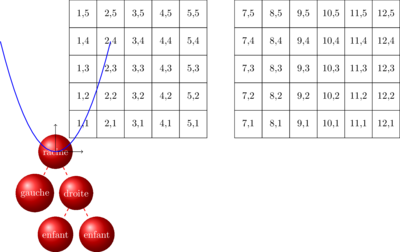

In [10]:
%%tikz -s 400,400 -sc 1 -f png
\foreach \x in {1,2,...,5,7,8,...,12}
\foreach \y in {1,...,5}
{
\draw (\x,\y) +(-.5,-.5) rectangle ++(.5,.5);
\draw (\x,\y) node{\x,\y};
}

[parent anchor=east,child anchor=west,grow=east]
\tikzstyle{every node}=[ball color=red,circle,text=white]
\tikzstyle{edge from parent}=[draw,dashed,thick,red]
\node {racine}
child {node {gauche}}
child {node {droite}
child {node {enfant}}
child {node {enfant}}
};

\draw [<->] (0,1) -- (0,0) -- (1,0);
\draw[blue,thick, domain=-2:2] plot (\x, {\x*\x});
%https://share.cocalc.com/share/96fd2324ae3de4c1f97ef1a116a87fd0839c3c2b/tikzimpatient.ipynb?viewer=share

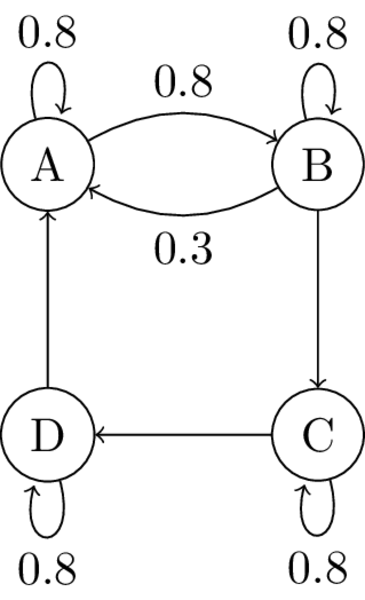

In [11]:
%%tikz -s 600,600

\node [circle, draw] at (0,0)  (A) {A};
\node [circle, draw] at (2,0)  (B) {B};
\node [circle, draw] at (2,-2) (C) {C};
\node [circle, draw] at (0,-2) (D) {D};

\path (A) edge [loop above] node {0.8}(A);
\path (B) edge [loop above] node {0.8}(B);
\path (C) edge [loop below] node {0.8}(C);
\path (D) edge [loop below] node {0.8}(D);

\draw[->](A) edge [bend left,above] node {0.8}(B);
\draw[->](B) edge [bend left,below] node {0.3}(A);

\draw[->] (B) -- (C);
\draw[->] (C) -- (D);
\draw[->] (D) -- (A);

$$
\mathbf{J}
=
\frac{d \mathbf{f}}{d \mathbf{x}}
=
\left[ \frac{\partial \mathbf{f}}{\partial x_1}
\cdots \frac{\partial \mathbf{f}}{\partial x_n} \right]
=
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \cdots &
\frac{\partial f_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \cdots &
\frac{\partial f_m}{\partial x_n}
\end{bmatrix}
$$

<table>
    <tr>
        <td>
\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\end{eqnarray}
        </td>
        <td>
\begin{eqnarray}
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{eqnarray}
        </td>
    </tr>
</table>

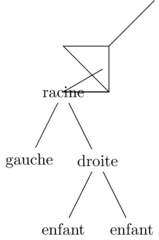

In [12]:
%%tikz
\draw (0,0) --  +(1,0) --  +(0,1) --  +(1,1);<br>
\draw (0,0) -- ++(1,0) -- ++(0,1) -- ++(1,1);<br>
\draw (1,0) -- (0,0) -- (30:1);

\node {racine}
child {node {gauche}}
child {node {droite}
child {node {enfant}}
child {node {enfant}}
};

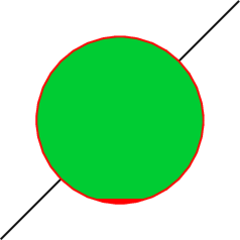

In [13]:
%%tikz 
\draw (-1,-1) -- (1,1);
\path[fill=green!80!blue,draw=red] (0,0) circle (7mm);

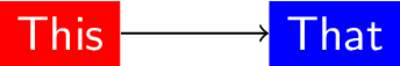

In [14]:
%%tikz
\tikzset{every node/.style={font=\sffamily,white}}
\node[fill=red] at (0,0) (a) {This};
\node[fill=blue] at (2,0) (b) {That};
\draw[->] (a) -- (b);

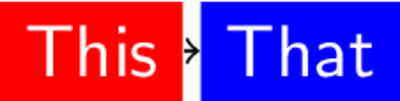

In [15]:
%%tikz --scale=0.5
\tikzset{every node/.style={font=\sffamily,white}}
\node[fill=red] at (0,0) (a) {This};
\node[fill=blue] at (2,0) (b) {That};
\draw[->] (a) -- (b);

In [16]:
%%tikz --scale=3
\tikzset{every node/.style={font=\sffamily,white}}
\node[fill=red] at (0,0) (a) {This};
\node[fill=blue] at (2,0) (b) {That};
\draw[->] (a) -- (b);

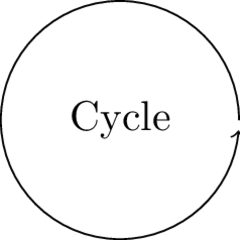

In [17]:
%%tikz
\draw[->] (1,0) arc(0:355:1);
\node {Cycle};

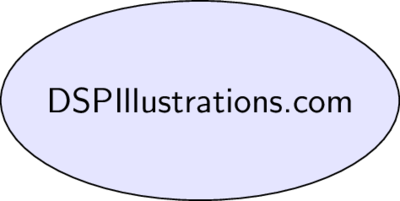

In [18]:
%%tikz
\draw (0,0) [fill=blue!10!white] ellipse (2cm and 1cm);
\node at (0,0) {\sffamily DSPIllustrations.com};

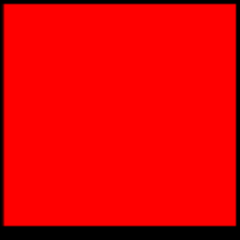

In [19]:
tikz_str = """
\draw[fill=red] (0,0) rectangle (1,1);
"""
%tikz $tikz_str

## collapsible markdown?

<details>
<summary>CLICK ME</summary>

<p>
    
#### yes, even hidden code blocks!

```python
print("hello world!")
```
</p>
</details>

In [20]:
from IPython.display import display, Math, Latex

display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))
t = """
\\rho(x,y)\left[
\\begin{array}{cc|c}
1&2&3 \\\\
4&5&6 \\\\
\\end{array} 
\\right]"""
display(Math(t))

t1 ="""
\\left[
\\begin{array}{c} 
x_1 \\\\
x_2 
\\end{array} 
\\right]
=
\\begin{bmatrix} 
A & B \\\\
C & D 
\\end{bmatrix} 
\\times 
\\left[
\\begin{array}{c} 
y_1 \\\\
y_2
\\end{array} 
\\right]
"""
display(Math(t1))

t2="""
\\begin{bmatrix} 
\\Phi_{11} & \\Phi_{12} \\\\ 
\\Phi_{21} & \\Phi_{22} 
\\end{bmatrix}
=
\\frac{1}{\\det(X)}
\\begin{bmatrix}
X_{22} Y_{11} - X_{12} Y_{21} & X_{22} Y_{12} - X_{12} Y_{22} \\\\
X_{11} Y_{21} - X_{21} Y_{11} & X_{11} Y_{22} - X_{21} Y_{12} 
\\end{bmatrix}
"""
display(Math(t2))

t3="""
\\begin{matrix} & \\begin{matrix}A&C&G&T\end{matrix} \\\\
\\begin{matrix}A\\\\C\\\\G\\\\T
\\end{matrix} & \\begin{pmatrix}
1&2&3&4\\\\
3&4&5&6\\\\
3&4&5&6\\\\
3&4&5&6
\\end{pmatrix}\\\\
\\end{matrix}"""
display(Math(t2),Math(t3))
hideMe="Yes" # hide this cell from show in Jupyter notebook

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
hideMe="Yes" # hide this cell from show in Jupyter notebook
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
#www='<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>'
www="""<script>
jQuery(function() 
{if(jQuery("body.notebook_app").length == 0) 
   {jQuery(".input_area").toggle(); 
    jQuery(".prompt").toggle();
   }
});
</script>"""
di.display_html(www, raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Everything hide</button>''', raw=True)

"""
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
"""

print("Markdown not work")

Everything hide

Markdown not work


$$
\begin{array}{c}
\begin{array}{ccccc}\phantom{-1}& H_1 &\phantom{-1}&\phantom{-1}& H_2\end{array} \\
\left[\begin{array}{rrrr|rr}
A &  0 &  0 &  0 & -1 & B \\
0 &  0 & -1 &  0 &  1 & 0 \\
\hline
0 &  0 &  0 & -1 &  1 & 0 \\
0 & -1 &  C &  D &  0 & 0
\end{array}\right] \\
\begin{array}{ccccc}\phantom{-1}& H_3 &\phantom{-1}&\phantom{-1}& H_4\end{array} \\
\end{array}
\begin{array}{cc}
\left[\begin{array}{l}
x_1 \\
x_{10} \\
x_5 \\
x_7 \\
\hline
x_9 \\
x_3
\end{array}\right] &
\!\!\!\!\begin{array}{c}\mathstrut \\ X_1 \\ \mathstrut \\ \mathstrut \\ X_2 \end{array}\!\!\!\!
\end{array}
=0$$

$$
\begin{matrix} %This is the super matrix
    %(1,1) cell: Empty
  &
    %(1,2) cell: Brace spanning columns
    \begin{matrix}   %One-row matrix to hold the brace
      \hphantom{a} & %Blank space to skip over first column
      \overbrace{
        \hphantom{\begin{matrix}b & c & d\end{matrix}}
      }^{\text{Final three columns}}
    \end{matrix}
  \\
    %(2,1) cell: Brace spanning rows
    \begin{matrix}    %One-column matrix to hold a brace
      \vphantom{a} \\ %Blank space to skip first row
      \text{Middle two rows}
        \left\{\vphantom{\begin{matrix} e \\ i \end{matrix}}\right. \\
      \vphantom{m}
    \end{matrix}
    %The inter-column spacing of the super matrix looks too big by default
    \mspace{-33mu}
  &
    %(2,2) cell: Actual matrix
    \begin{pmatrix}
      a & b & c & d \\
      e & f & g & h \\
      i & j & k & l \\
      m & n & o & p
    \end{pmatrix} 
\end{matrix} 
$$

$$
\begin{align}
\text{Probability density function:}\\
\begin{cases}
\frac{1}{b-a}&\text{for $x\in[a,b]$}\\
0&\text{otherwise}\\
\end{cases}
\\
\text{Cumulative distribution function:}\\
\begin{cases}
0&\text{for $x<a$}\\
\frac{x-a}{b-a}&\text{for $x\in[a,b)$}\\
1&\text{for $x\ge b$}\\
\end{cases}
\end{align}
$$